In [1]:
from multi_path_base import *
from scipy import interpolate
forecast_with_data=np.load('forecast_with_data.npy')

In [2]:
#cleaning data
interpolation_points=150
forecast_data_inter= np.zeros((3,forecast_with_data.shape[0], interpolation_points ))
x = np.arange(1,72+1,1)
xnew = np.linspace(0,72,interpolation_points)
counter=0
i=0;j=0
while j< forecast_with_data.shape[0]: #fix redundant indicies
    
    y1=forecast_with_data[j,:,1]
    y2=forecast_with_data[j,:,2]
    inter_1=interpolate.interp1d(x, y1, fill_value='extrapolate')
    inter_2=interpolate.interp1d(x, y2, fill_value='extrapolate')
    p=inter_1(xnew)
    d=inter_2(xnew)
    
    if  sum(1*np.isnan(p))==0 and \
        sum(1*np.isnan(d))==0 and \
        np.max(p)<=1 and \
        np.min(p)>=0 and \
        np.max(d)<=1 and \
        np.min(d)>=0:
        
        forecast_data_inter[0,i,:]= p
        forecast_data_inter[1,i,:]= d
        forecast_data_inter[2,i,0]= forecast_with_data[j,0,0]
        i+=1
    j+=1
n_paths=i
print('paths left', i)

paths left 1193


In [3]:
N=forecast_data_inter.shape[2]
M=forecast_data_inter.shape[1]
#M=100
dt=1

#forecast_data_inter[0,:,:] #forecast

disct_temp = disct(N,dt,M)
p=forecast_data_inter[0,:,:]
V= forecast_data_inter[1,:,:] -forecast_data_inter[0,:,:]

this_model=model_modified_drift(disct_temp,V, forecast= p)


In [4]:
x = np.linspace(1, 15, 20)
y = np.linspace(1, 15, 20)

X, Y = np.meshgrid(x, y)

In [ ]:
x = np.linspace(1, 15, 20)
y = np.linspace(1, 15, 20)

X, Y = np.meshgrid(x, y)

Z=np.zeros((len(y), len(x)))
for i in range(0,len(x)):
    for j in range(0,len(y)):
        Z[j,i] = this_model.likelihood(param=np.array((X[j,i],Y[j,i])))

/Users/alhaddwt/Waleed Dropbox/Waleed Al-Haddad/GitLab/wind-power/python_code/multi_path_base.py:599: RuntimeWarning: divide by zero encountered in double_scalars
  beta_param_alpha= - ( (1+a)*(a**2 +b -1)    )/(2*b)
/Users/alhaddwt/Waleed Dropbox/Waleed Al-Haddad/GitLab/wind-power/python_code/multi_path_base.py:600: RuntimeWarning: divide by zero encountered in double_scalars
  beta_param_beta= ( (a-1)*(a**2 + b -1)  )  /(2*b)


/Users/alhaddwt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/alhaddwt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/alhaddwt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/Users/alhaddwt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]


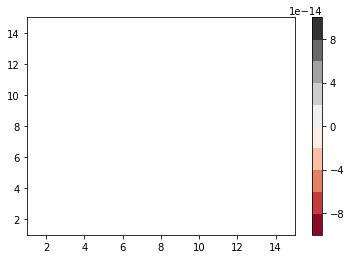

In [ ]:
contours_1=plt.contourf(X, Y, Z, 10, cmap='RdGy')
plt.colorbar();

plt.savefig('ISO_lines_2_really.pdf')

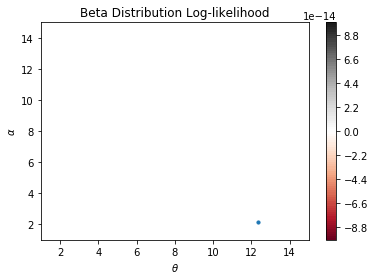

In [ ]:
contours=plt.contourf(X, Y, Z, 100, cmap='RdGy')
plt.colorbar();
plt.title('Beta Distribution Log-likelihood') #,fontsize=24
plt.xlabel('$\\theta$')
plt.ylabel('$\\alpha$')
plt.scatter(12.32, 2.16, s=10)
plt.savefig('ISO_lines_detailed_really.pdf')

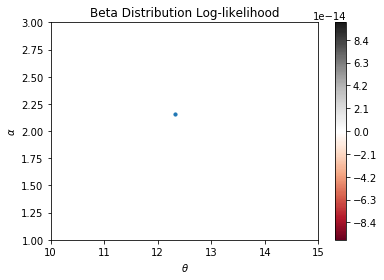

In [ ]:
contours=plt.contourf(X, Y, Z, 200, cmap='RdGy')
plt.colorbar();
plt.title('Beta Distribution Log-likelihood') #,fontsize=24
plt.xlabel('$\\theta$')
plt.ylabel('$\\alpha$')
plt.xlim(10, 15)
plt.ylim(1, 3)
plt.scatter(12.32, 2.16, s=10)
plt.savefig('ISO_lines_detailed_zoom_really.pdf')

In [ ]:
x1 = np.linspace(8, 20, 15)
y1 = np.linspace(1, 5, 15)

X1, Y1 = np.meshgrid(x1, y1)

Z2=np.zeros((len(y1), len(x1)))
for i in range(0,len(x1)):
    for j in range(0,len(y1)):
        Z2[j,i] = this_model.likelihood(param=np.array((X1[j,i],Y1[j,i])))

In [ ]:
contours_3=plt.contourf(X1, Y1, Z2, 40, cmap='RdGy')
plt.colorbar();
plt.scatter(12.32, 2.16, s=10)

plt.savefig('ISO_lines_zoom_3_really.pdf')